# Task 2 - Anomaly detection
Description:
Provided dataset contains data from sensors that measure traffic on different road sections .

Files are created per Sensor and Metric, so the filename looks like that: <metric_name>_<sensor_id>.csv
Not all sensors provide data for all metrics.
#### Included metrics are:
occupancy - avg number of vehicles.
speed - avg speed.
travel time - avg travel time.

Perform anomaly detection on following dataset and provide report from analysis.
#### Required task output:
Code provided as a jupyter notebook or other preferred toolkit. Python is preferred, but R is also acceptable.

Report from analysis including methods used and reasoning, findings, screenshots of graphs, code etc.
#### What will be measured:
1. Ability to perform an analysis, including data processing, data preparation, visualization etc.
2. Code quality
3. Knowledge of anomaly detection methods
4. Ability to prepare clean and understandable report with findings from analysis

In [264]:
import os
os.getcwd()

import pandas as pd

import numpy as np
np .__version__
import seaborn as sns
import sklearn as sk
sk .__version__
import scipy
scipy.__version__

'1.1.0'

In [265]:
data_occupancy_6005 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\occupancy_6005.csv',index_col=0) 
data_occupancy_6005.rename(columns={"value": "value_data_occupancy_6005"},inplace=True)
data_occupancy_t4013 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\occupancy_t4013.csv',index_col=0)
data_occupancy_t4013.rename(columns={"value": "value_data_occupancy_t4013"},inplace=True)
data_speed_6005 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\speed_6005.csv',index_col=0)
data_speed_6005.rename(columns={"value": "value_data_speed_6005"},inplace=True)
data_speed_7578 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\speed_7578.csv',index_col=0)
data_speed_7578.rename(columns={"value": "value_data_speed_7578"},inplace=True)
data_speed_t4013 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\speed_t4013.csv',index_col=0)
data_speed_t4013.rename(columns={"value": "value_data_speed_t4013"},inplace=True)
data_TravelTime_387 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\TravelTime_387.csv',index_col=0)
data_TravelTime_387.rename(columns={"value": "data_TravelTime_387"},inplace=True)
data_TravelTime_451 = pd.read_csv(r'C:\Users\KozakAnn\PRE\realTraffic\TravelTime_451.csv',index_col=0)
data_TravelTime_451.rename(columns={"value": "value_data_TravelTime_451"},inplace=True)
data_speed_7578.head()

,value_data_speed_7578
timestamp,
2015-09-08 11:39:00,73
2015-09-08 11:44:00,62
2015-09-08 11:59:00,66
2015-09-08 12:19:00,69
2015-09-08 12:24:00,65


In [266]:
#tab=pd.DataFrame(metrics.get_scorer(y_pred))
dane = pd.concat( [
                   data_speed_6005.reset_index(drop=False),
                   data_speed_7578.reset_index(drop=True),
                   data_speed_t4013.reset_index(drop=True),
                   data_occupancy_6005.reset_index(drop=True),
                   data_occupancy_t4013.reset_index(drop=True),
                   data_TravelTime_387.reset_index(drop=True),
                   data_TravelTime_451.reset_index(drop=True)
     ] ,axis=1,
                ) 

dane_sample=dane.sample(n=20).T
dane_sample

 

,1953,2123,201,1273,1219,29,801,2193,785,667,620,1277,774,1208,902,758,691,511,1692,2424
timestamp,2015-09-15 13:06:00,2015-09-16 06:39:00,2015-09-02 06:05:00,2015-09-12 04:06:00,2015-09-11 18:26:00,2015-09-01 01:07:00,2015-09-09 07:34:00,2015-09-16 12:39:00,2015-09-08 21:21:00,2015-09-04 18:42:00,2015-09-04 13:52:00,2015-09-12 05:06:00,2015-09-08 19:51:00,2015-09-11 17:29:00,2015-09-09 22:13:00,2015-09-08 17:46:00,2015-09-04 21:18:00,2015-09-03 20:27:00,2015-09-14 10:53:00,2015-09-17 10:10:00
value_data_speed_6005,75,82,89,90,84,83,86,77,86,85,92,84,87,91,65,82,83,89,79,66
value_data_speed_7578,NaN,NaN,68,NaN,NaN,69,67,NaN,51,66,62,NaN,66,NaN,73,67,65,64,NaN,NaN
value_data_speed_t4013,61,62,62,68,62,62,70,62,63,66,64,73,66,70,62,60,63,61,59,61
value_data_occupancy_6005,0,3.11,2.67,3.22,6.17,1.56,0.67,0,0.67,1.39,4.5,2.83,1.67,4.22,8.61,4,4.5,8.67,1.17,NaN
value_data_occupancy_t4013,6.83,9.11,15.11,0.78,6.94,9.06,1.5,7.5,6.89,10.5,8.61,2.78,3.89,8.33,8.11,12.06,9.33,5.11,6.5,7.11
data_TravelTime_387,139,124,23,350,202,93,164,124,332,109,631,386,166,225,222,97,122,179,430,97
value_data_TravelTime_451,261,372,1011,686,319,210,366,NaN,117,663,195,165,52,167,172,194,236,87,248,NaN


In [267]:
dane.dtypes

timestamp                      object
value_data_speed_6005           int64
value_data_speed_7578         float64
value_data_speed_t4013        float64
value_data_occupancy_6005     float64
value_data_occupancy_t4013    float64
data_TravelTime_387             int64
value_data_TravelTime_451     float64
dtype: object

In [268]:
df=dane
#df['timestamp_date'] = pd.to_datetime(df['timestamp'])
import datetime as dt
from datetime import datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']=df['timestamp'].map(dt.datetime.toordinal)

#df['timestamp'] = df['timestamp'].map(dt.datetime.toordinal)
df.dtypes

timestamp                       int64
value_data_speed_6005           int64
value_data_speed_7578         float64
value_data_speed_t4013        float64
value_data_occupancy_6005     float64
value_data_occupancy_t4013    float64
data_TravelTime_387             int64
value_data_TravelTime_451     float64
dtype: object

In [269]:
#df_ = df.drop(columns="timestamp")
df_ = df

df_.dtypes

timestamp                       int64
value_data_speed_6005           int64
value_data_speed_7578         float64
value_data_speed_t4013        float64
value_data_occupancy_6005     float64
value_data_occupancy_t4013    float64
data_TravelTime_387             int64
value_data_TravelTime_451     float64
dtype: object

In [270]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,2500.0,735851.140400,5.322783,735841.0,735845.00,735852.00,735856.00,735858.00
value_data_speed_6005,2500.0,81.906800,8.746606,20.0,77.00,82.00,88.00,109.00
value_data_speed_7578,1127.0,64.048802,9.236979,1.0,63.00,66.00,68.00,90.00
value_data_speed_t4013,2495.0,62.934269,5.192649,11.0,61.00,63.00,65.00,77.00
value_data_occupancy_6005,2380.0,4.495147,3.404555,0.0,1.94,3.83,6.17,22.28
value_data_occupancy_t4013,2500.0,7.242640,4.372321,0.0,4.06,6.83,9.83,43.06
data_TravelTime_387,2500.0,325.093600,399.555124,9.0,133.00,201.00,366.00,5059.00
value_data_TravelTime_451,2162.0,327.221554,444.743886,22.0,146.00,203.00,332.00,5578.00


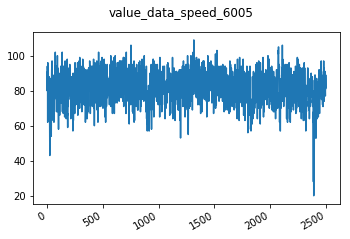

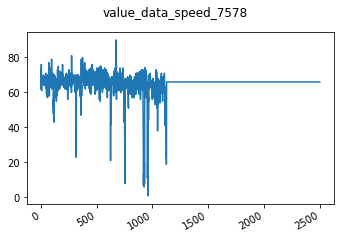

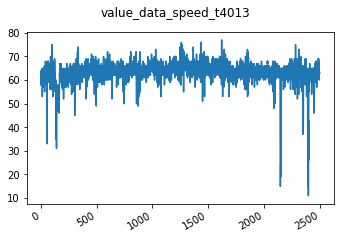

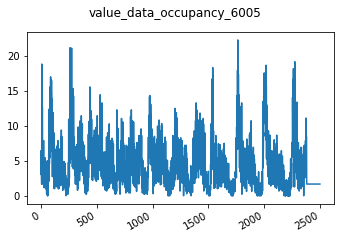

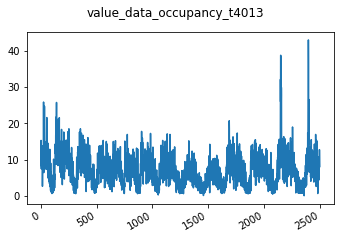

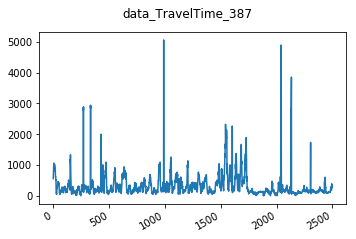

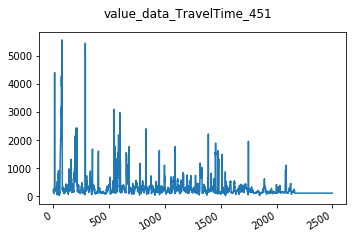

In [271]:
columns = ["value_data_speed_6005", "value_data_speed_7578", "value_data_speed_t4013", "value_data_occupancy_6005", "value_data_occupancy_t4013",
 "data_TravelTime_387", "value_data_TravelTime_451"]
for column in columns:
    df_i[column].plot.line(subplots=True, 
                                   title=column,
                                   figsize=(5.5, 3.5))
    plt.show()
    

[Text(0, 0.5, 'value_data_TravelTime_451'),
 Text(0.5, 0, 'timestamp'),
 Text(0.5, 1.0, 'value_data_TravelTime_451')]

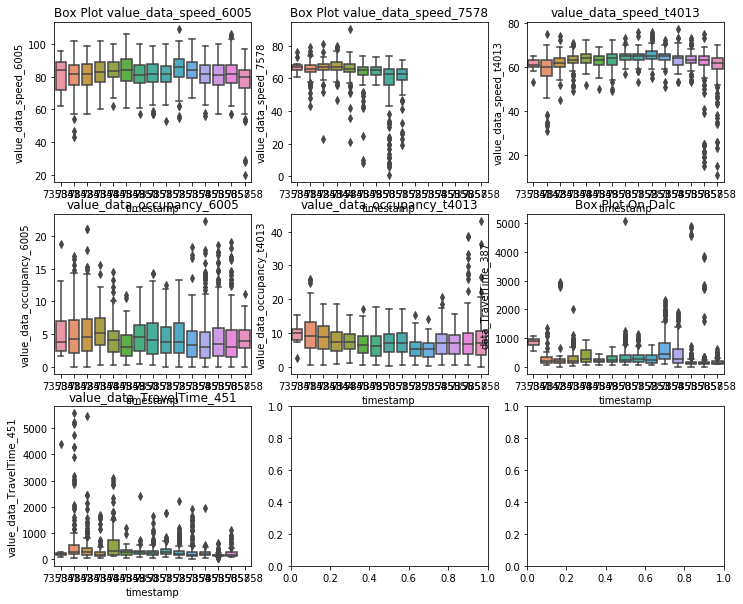

In [272]:
import seaborn as sn
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12, 10)


# "value_data_speed_6005", "value_data_speed_7578", "value_data_speed_t4013", "value_data_occupancy_6005", "value_data_occupancy_t4013",
# "data_TravelTime_387", "value_data_TravelTime_451"

    
sn.boxplot(data=df,y="value_data_speed_6005",x="timestamp",orient="v",ax=axes[0][0]) 
sn.boxplot(data=df,y="value_data_speed_7578",x="timestamp",orient="v",ax=axes[0][1]) 
sn.boxplot(data=df,y="value_data_speed_t4013",x="timestamp",orient="v",ax=axes[0][2]) 
sn.boxplot(data=df,y="value_data_occupancy_6005",x="timestamp",orient="v",ax=axes[1][0]) 
sn.boxplot(data=df,y="value_data_occupancy_t4013",x="timestamp",orient="v",ax=axes[1][1])
sn.boxplot(data=df,y="data_TravelTime_387",x="timestamp",orient="v",ax=axes[1][2])
sn.boxplot(data=df,y="value_data_TravelTime_451",x="timestamp",orient="v",ax=axes[2][0])

axes[0][0].set(xlabel='timestamp', ylabel='value_data_speed_6005',title="Box Plot value_data_speed_6005")
axes[0][1].set(xlabel='timestamp', ylabel='value_data_speed_7578',title="Box Plot value_data_speed_7578")
axes[0][2].set(xlabel='timestamp', ylabel='value_data_speed_t4013',title="value_data_speed_t4013")
axes[1][0].set(xlabel='timestamp', ylabel='value_data_occupancy_6005',title="value_data_occupancy_6005")
axes[1][1].set(xlabel='timestamp', ylabel='value_data_occupancy_t4013',title="value_data_occupancy_t4013")
axes[1][2].set(xlabel='timestamp', ylabel='data_TravelTime_387',title="Box Plot On Dalc")
axes[2][0].set(xlabel='timestamp', ylabel='value_data_TravelTime_451',title="value_data_TravelTime_451")

In [273]:
df_missing = df_.isna()
df_num_missing = df_missing.sum()
df_num_missing

timestamp                        0
value_data_speed_6005            0
value_data_speed_7578         1373
value_data_speed_t4013           5
value_data_occupancy_6005      120
value_data_occupancy_t4013       0
data_TravelTime_387              0
value_data_TravelTime_451      338
dtype: int64

In [274]:
from sklearn.impute import SimpleImputer
mf_imputer = SimpleImputer(strategy="most_frequent")
mf_imputer.fit(df_)
mf_imputer.transform(df_)

df_i=pd.DataFrame(mf_imputer.transform(df_), 
             columns=df_.columns)
df_i_sample=df_i.sample(n=20).T
df_i_sample


,1193,24,2024,1900,1657,929,298,1906,1908,7,70,2130,1333,830,1661,1922,1328,752,376,1071
timestamp,735852.00,735842.00,735856.00,735856.00,735855.00,735851.00,735843.00,735856.00,735856.00,735841.00,735842.00,735857.00,735853.00,735850.00,735855.00,735856.00,735853.00,735849.00,735844.00,735852.00
value_data_speed_6005,84.00,57.00,71.00,91.00,86.00,91.00,84.00,83.00,75.00,96.00,91.00,84.00,81.00,97.00,76.00,85.00,81.00,106.00,83.00,76.00
value_data_speed_7578,66.00,70.00,66.00,66.00,66.00,8.00,69.00,66.00,66.00,62.00,67.00,66.00,66.00,65.00,66.00,66.00,66.00,25.00,68.00,62.00
value_data_speed_t4013,67.00,62.00,62.00,63.00,67.00,67.00,58.00,63.00,66.00,60.00,63.00,66.00,66.00,65.00,66.00,62.00,62.00,66.00,61.00,68.00
value_data_occupancy_6005,2.56,7.89,7.72,3.33,5.44,1.56,7.11,1.67,3.22,1.67,6.06,4.78,0.89,10.56,2.33,0.39,1.17,1.17,7.72,1.56
value_data_occupancy_t4013,9.56,14.94,4.06,7.33,6.11,10.94,1.78,9.67,11.83,10.72,8.33,13.50,7.22,12.17,3.67,15.50,8.06,6.83,10.11,8.56
data_TravelTime_387,271.00,526.00,190.00,162.00,187.00,152.00,208.00,259.00,170.00,1005.00,138.00,2833.00,153.00,77.00,487.00,146.00,148.00,141.00,133.00,154.00
value_data_TravelTime_451,185.00,312.00,155.00,293.00,199.00,358.00,595.00,172.00,155.00,168.00,3182.00,201.00,204.00,270.00,169.00,158.00,653.00,470.00,100.00,293.00


In [275]:
df_i['timestamp'] = pd.to_datetime(df_i['timestamp'])
df_i['timestamp'] = df_i['timestamp'].map(dt.datetime.toordinal)

from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=5, random_state=214)
iforest.fit(df_i)
anomaly_score = iforest.score_samples(df_i)
anomaly_score
#df_i.sample(n=5)

array([-0.5215948 , -0.40762586, -0.42471015, ..., -0.34831198,
       -0.34718599, -0.34718599])

In [276]:
df_i["anomaly_score"] = iforest.score_samples(df_i)
df_i.sample(n=5).T

,2019,82,2473,343,1578
timestamp,719163.000000,719163.000000,719163.0000,719163.000000,719163.000000
value_data_speed_6005,86.000000,87.000000,71.0000,73.000000,80.000000
value_data_speed_7578,66.000000,74.000000,66.0000,68.000000,66.000000
value_data_speed_t4013,65.000000,62.000000,65.0000,59.000000,65.000000
value_data_occupancy_6005,15.830000,10.440000,1.6700,7.500000,4.110000
value_data_occupancy_t4013,13.000000,6.110000,6.2200,12.780000,6.280000
data_TravelTime_387,434.000000,136.000000,129.0000,275.000000,724.000000
value_data_TravelTime_451,302.000000,226.000000,114.0000,89.000000,289.000000
anomaly_score,-0.437653,-0.403159,-0.3642,-0.401323,-0.396507


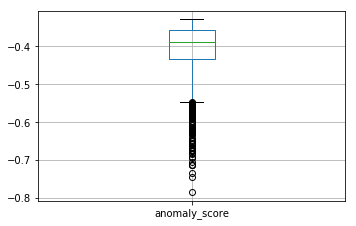

In [277]:
df_i.boxplot(column="anomaly_score",figsize=(5.5, 3.5))

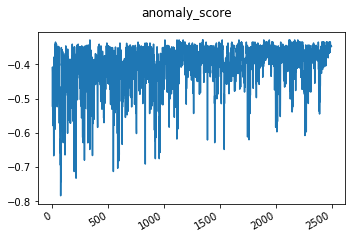

In [278]:
columns = ["anomaly_score"]
for column in columns:
    df_i[column].plot.line(subplots=True, 
                                   title=column,
                                   figsize=(5.5, 3.5))
    plt.show()

#### Summary
Dane zagregowane do poziomu data/godzina/min, docelowo moze potrzebna byloby też sprawdzenie innej agregacji danych np. do godz, a nie min
Braki danych imputowano metodą SimplerImputer
Zastosowano metodę IsolationForest
Boxplot dla anomaly_score pokazuje poniżej jakich wartości (poniżej -0.6) należałoby przyjąć, że pomiar jest anomalią, ale też widać ze w czasie ten poziom sie różni
